In [1]:
%reset -f

import pandas as pd
import pickle

import warnings
warnings.filterwarnings(action="ignore")

from exploration import *

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
seed = 1
print("Seed value: ", seed)

Seed value:  1


#### Method 1 : predict y_train et y_test des énergies

In [4]:
all_energy_dir = ["steam", "electricity", "gas" ] #"total_energy"
all_energy_names = ["Ratio_Steam+Gas", "Ratio_Electricity", "Ratio_Gas", ] #"Log-TotalEnergy(kBtu)"

In [7]:
train_energy_file = r"C:\Users\oumei\Documents\OC_projets\P4\P4_Data_Science_OpenClassrooms\model\test\ratio\train_ratio.csv"
test_energy_file = r"C:\Users\oumei\Documents\OC_projets\P4\P4_Data_Science_OpenClassrooms\model\test\ratio\test_ratio.csv"

train_energy = pd.read_csv(train_energy_file, sep=",")
test_energy = pd.read_csv(test_energy_file, sep=",")

X_train_energy = train_energy.iloc[:, :-4]
X_test_energy = test_energy.iloc[:, :-4]

In [8]:
X_train_energy

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.739835,0.529688,0.610942,0.733123,-0.923528,-0.439239,1927
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.602172,0.712666,0.611865,0.670863,1.072892,2.153810,1996
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.756773,3.287491,3.195060,3.260821,-0.923528,-0.439239,1969
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.782088,0.640225,0.146566,0.738385,-0.923528,-0.439239,1999
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.107393,0.703626,0.791386,0.909942,-0.923528,-0.439239,1926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.096471,-0.349445,-0.301074,-0.143318,0.841584,-0.439239,2015
2198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.287309,-0.913535,-0.915136,-0.752192,0.866893,2.071010,2015
2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.904820,0.151911,0.124058,0.478537,-0.923528,-0.439239,2015
2200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.904820,2.037475,2.175125,2.265880,-0.923528,-0.439239,2015


In [13]:
train_energy

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.529688,0.610942,0.733123,-0.923528,-0.439239,1927,0.546060,0.176638,0.453940,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.712666,0.611865,0.670863,1.072892,2.153810,1996,0.386609,0.613391,0.613391,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.287491,3.195060,3.260821,-0.923528,-0.439239,1969,0.682307,0.020579,0.317693,7.645053
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.640225,0.146566,0.738385,-0.923528,-0.439239,1999,0.609884,0.390116,0.390116,5.713106
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.703626,0.791386,0.909942,-0.923528,-0.439239,1926,0.577418,0.061159,0.422582,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.349445,-0.301074,-0.143318,0.841584,-0.439239,2015,0.631241,0.368758,0.368758,3.370051
2198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913535,-0.915136,-0.752192,0.866893,2.071010,2015,0.399864,0.600136,0.600136,4.338858
2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.151911,0.124058,0.478537,-0.923528,-0.439239,2015,0.643349,0.356651,0.356651,4.021057
2200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.037475,2.175125,2.265880,-0.923528,-0.439239,2015,0.535272,0.464728,0.464728,6.150390


In [9]:


for index, energy_dir in enumerate(all_energy_dir):

    # we load each best model for each energy features
    filename = 'model/{}/best_model_{}.sav'.format(energy_dir, energy_dir)
    best_model_energy = pickle.load(open(filename, 'rb'))

    y_pred_train_energy = best_model_energy.predict(X_train_energy)
    series_y_pred_train = pd.Series(y_pred_train_energy)
    # we put into one Series the prediction of the train set and test set
    df_pred_train = pd.DataFrame(series_y_pred_train, columns=[all_energy_names[index]])
    #display(df_pred_train) # OK

    y_pred_test_energy = best_model_energy.predict(X_test_energy)
    series_y_pred_test = pd.Series(y_pred_test_energy)
    df_pred_test = pd.DataFrame(series_y_pred_test, columns=[all_energy_names[index]])
    #display(df_pred_test) # OK

    df = pd.concat([df_pred_train, df_pred_test])

    if index == 0:
        df_energy = pd.DataFrame({})
    df_energy = pd.concat([df_energy, df], axis=1)

display(df_energy)

#df_energy_CO2 = pd.concat([df_energy, ])

,Ratio_Steam+Gas,Ratio_Electricity,Ratio_Gas
0,0.472914,0.546002,0.198674
1,0.501814,0.513258,0.445521
2,0.405701,0.581044,0.202555
3,0.330792,0.676572,0.295001
4,0.340176,0.653771,0.191364
...,...,...,...
940,0.297068,0.704852,0.247629
941,0.247165,0.753962,0.264936
942,0.280553,0.703051,0.288172
943,0.311241,0.692616,0.314655


In [14]:
#train_CO2_file = "./dataset/cleaned/CO2/train_CO2.csv"
#test_CO2_file = "./dataset/cleaned/CO2/test_CO2.csv"

#train = pd.read_csv(train_CO2_file, sep=",")
#test = pd.read_csv(test_CO2_file, sep=",")

target = "Log-TotalGHGEmissions"

y_train = train_energy[target]
y_test = test_energy[target]

series_y_train = pd.Series(y_train)
df_train = pd.DataFrame(series_y_train, columns=[target])

series_y_test = pd.Series(y_test)
df_test = pd.DataFrame(series_y_test, columns=[target])

In [15]:
display(df_train)
display(df_test)

,Log-TotalGHGEmissions
0,5.525373
1,5.693261
2,7.645053
3,5.713106
4,5.404972
...,...
2197,3.370051
2198,4.338858
2199,4.021057
2200,6.150390


,Log-TotalGHGEmissions
0,5.660979
1,6.226556
2,5.176940
3,6.539962
4,5.796757
...,...
940,5.330397
941,2.776954
942,6.908815
943,4.583947


In [16]:
df = pd.concat([df_train, df_test])
dataset = pd.concat([df_energy, df], axis=1)

display(dataset)

,Ratio_Steam+Gas,Ratio_Electricity,Ratio_Gas,Log-TotalGHGEmissions
0,0.472914,0.546002,0.198674,5.525373
1,0.501814,0.513258,0.445521,5.693261
2,0.405701,0.581044,0.202555,7.645053
3,0.330792,0.676572,0.295001,5.713106
4,0.340176,0.653771,0.191364,5.404972
...,...,...,...,...
940,0.297068,0.704852,0.247629,5.330397
941,0.247165,0.753962,0.264936,2.776954
942,0.280553,0.703051,0.288172,6.908815
943,0.311241,0.692616,0.314655,4.583947


#### Method  : predict y des énergies X

In [17]:
# We create a training set and a test set (the test set contains 30% of the dataset)
train_common, test_common = train_test_split(dataset, test_size=0.3,  random_state=seed)

In [18]:
dataset.columns.tolist()[:-1]

['Ratio_Steam+Gas', 'Ratio_Electricity', 'Ratio_Gas']

In [19]:
# liste des variables et étiquettes
model_CO2_target = ['Log-TotalGHGEmissions']
model_CO2_features = dataset.columns.tolist()[:-1]
#model_CO2_features = ['Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)', 'Log-TotalEnergy(kBtu)']
model_CO2 = model_CO2_features + model_CO2_target

In [20]:
# Selection des variables pour modélisation CO2
train_CO2, test_CO2 = train_common[model_CO2], test_common[model_CO2]

In [21]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_CO2 = StandardScaler().fit(train_CO2[model_CO2_features])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_CO2_std, test_CO2_std = train_CO2.copy(), test_CO2.copy()

train_CO2_std[model_CO2_features] = std_scaler_CO2.transform(train_CO2[model_CO2_features])
test_CO2_std[model_CO2_features] = std_scaler_CO2.transform(test_CO2[model_CO2_features])

In [22]:
print("Before")
display(train_CO2)
print("After")
display(train_CO2_std)

Before


,Ratio_Steam+Gas,Ratio_Electricity,Ratio_Gas,Log-TotalGHGEmissions
1008,0.137230,0.854342,0.171921,1.865629
1784,0.623363,0.390878,0.555777,3.089223
1563,0.052989,0.944326,0.058196,2.585506
452,0.198429,0.791006,0.160123,3.421653
1561,0.031791,0.958737,0.049718,1.536867
...,...,...,...,...
561,0.261885,0.748376,0.355986,3.639689
905,0.317799,0.684290,0.268090,1.291984
1096,0.623057,0.368116,0.622640,3.507058
235,0.287231,0.722768,0.281762,4.321613


After


,Ratio_Steam+Gas,Ratio_Electricity,Ratio_Gas,Log-TotalGHGEmissions
1008,-0.815812,0.775627,-0.543152,1.865629
1784,2.230628,-2.168321,2.000406,3.089223
1563,-1.343727,1.347213,-1.296733,2.585506
452,-0.432299,0.373317,-0.621332,3.421653
1561,-1.476565,1.438753,-1.352912,1.536867
...,...,...,...,...
561,-0.034639,0.102524,0.676522,3.639689
905,0.315756,-0.304549,0.094098,1.291984
1096,2.228710,-2.312906,2.443463,3.507058
235,0.124193,-0.060136,0.184688,4.321613


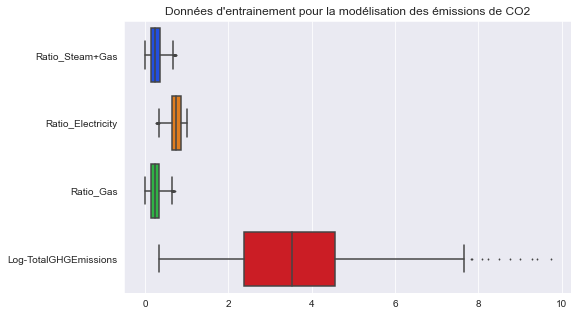

In [23]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_CO2), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

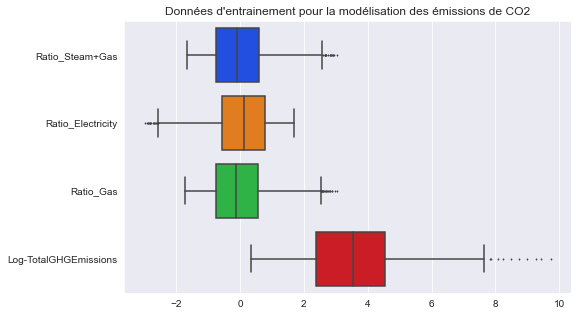

In [24]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_CO2_std), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

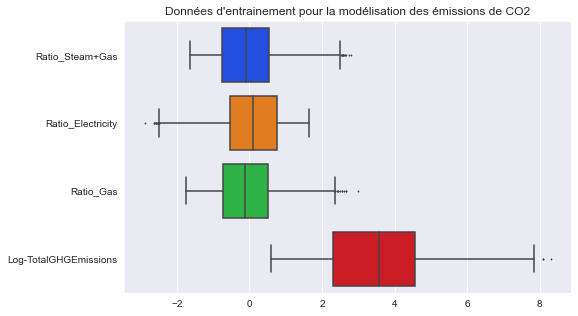

In [25]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(test_CO2_std), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

___Density distribution___


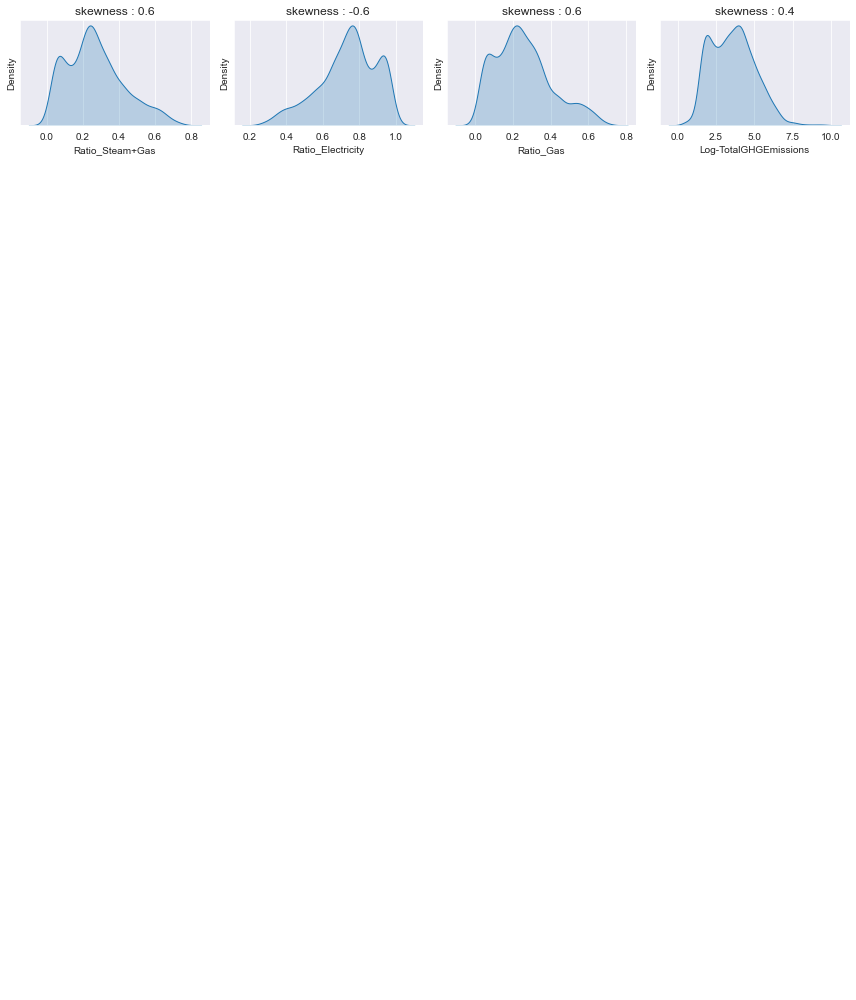

In [26]:
density(train_CO2)

___Density distribution___


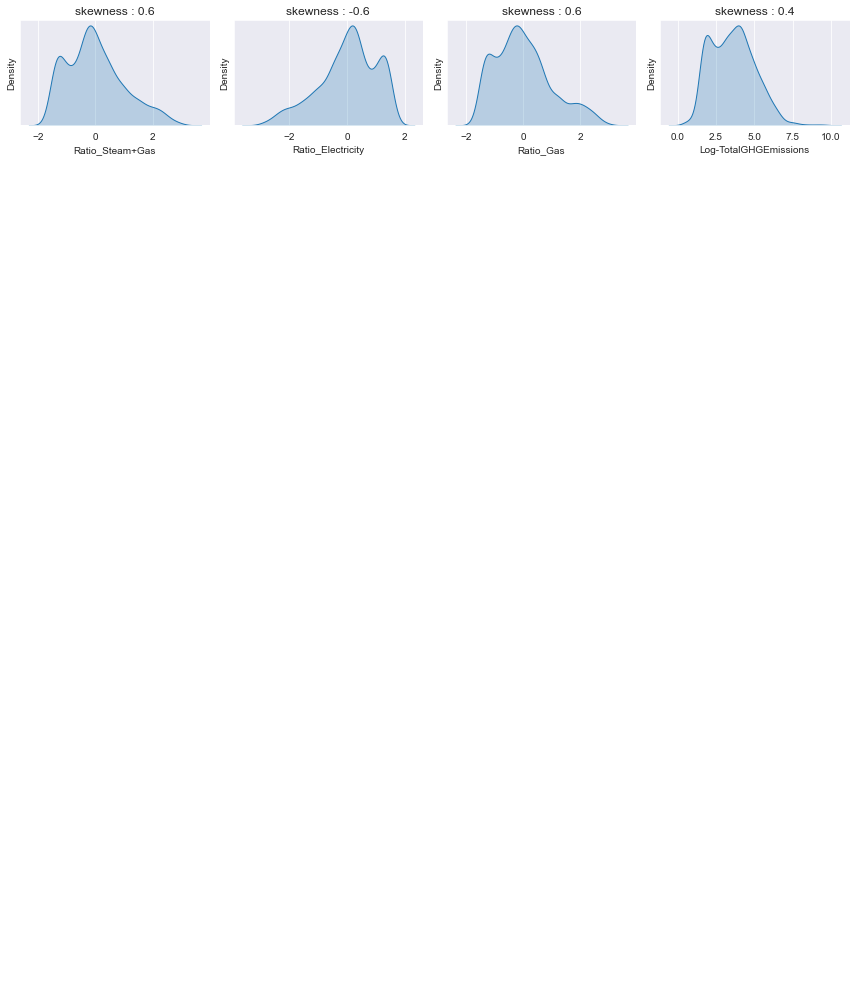

In [27]:
density(train_CO2_std)

In [28]:
path = "./model/"

# Sauvegarde des jeux de données
train_CO2_std.to_csv("{}{}".format(path, "/test/CO2/train_CO2.csv"), encoding='utf-8', index=False)
test_CO2_std.to_csv("{}{}".format(path, "/test/CO2/test_CO2.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_CO2, 'scaler_features': model_CO2_features}
filename = 'model/test/CO2/scaler_CO2.sav'
pickle.dump(model, open(filename, 'wb'))

In [29]:
train_CO2_std

,Ratio_Steam+Gas,Ratio_Electricity,Ratio_Gas,Log-TotalGHGEmissions
1008,-0.815812,0.775627,-0.543152,1.865629
1784,2.230628,-2.168321,2.000406,3.089223
1563,-1.343727,1.347213,-1.296733,2.585506
452,-0.432299,0.373317,-0.621332,3.421653
1561,-1.476565,1.438753,-1.352912,1.536867
...,...,...,...,...
561,-0.034639,0.102524,0.676522,3.639689
905,0.315756,-0.304549,0.094098,1.291984
1096,2.228710,-2.312906,2.443463,3.507058
235,0.124193,-0.060136,0.184688,4.321613


### From df_exploration

In [38]:
all_energy_dir = ["steam", "electricity", "gas", "total_energy"]
all_energy_names = ["Log-SteamUse(kBtu)", "Log-Electricity(kBtu)", "Log-NaturalGas(kBtu)", "Log-TotalEnergy(kBtu)"]

train_energy_file = "./dataset/cleaned/energy/train_energy.csv"
train_energy = pd.read_csv(train_energy_file, sep=",")
X_train_energy = train_energy.iloc[:, :-4]

test_energy_file = "./dataset/cleaned/energy/test_energy.csv"
test_energy = pd.read_csv(test_energy_file, sep=",")
X_test_energy = test_energy.iloc[:, :-4]

df_energy_before_pred = pd.concat([X_train_energy, X_test_energy])
display(df_energy_before_pred)

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofBuildings,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFAParking,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035067,1.739835,0.529688,-0.405348,-0.923528,-0.439239,1927
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035067,1.602172,0.712666,2.274807,1.072892,2.153810,1996
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035067,3.756773,3.287491,2.990638,-0.923528,-0.439239,1969
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035067,-0.782088,0.640225,2.526634,-0.923528,-0.439239,1999
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035067,1.107393,0.703626,-0.405348,-0.923528,-0.439239,1926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.035067,0.904820,1.553162,2.618557,1.527976,-0.439239,2015
941,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035067,0.675162,0.497963,2.128455,0.944811,1.780089,2015
942,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035067,0.675162,2.107630,2.756954,1.478762,3.044854,2015
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035067,0.904820,1.521235,2.654283,1.298680,-0.439239,2015


In [39]:
for index, energy_dir in enumerate(all_energy_dir):

    # we load each best model for each energy features
    filename = 'model/{}/best_model_{}.sav'.format(energy_dir, energy_dir)
    best_model_energy = pickle.load(open(filename, 'rb'))

    y_pred_energy = best_model_energy.predict(df_energy_before_pred)
    series_y_pred = pd.Series(y_pred_energy)
    # we put into one Series the prediction of the train set and test set
    df_pred = pd.DataFrame(series_y_pred, columns=[all_energy_names[index]])
    #display(df_pred_train) # OK

    if index == 0:
        df_energy_after = pd.DataFrame({})
    df_energy_after = pd.concat([df_energy_after, df_pred], axis=1)

display(df_energy_after)

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu)
0,13.715364,14.952680,13.346070,15.732227
1,0.917257,15.282577,13.938305,15.719900
2,13.036413,17.329882,14.800173,17.833543
3,0.783009,15.225394,11.130920,15.766363
4,11.624198,15.137360,9.830969,15.771748
...,...,...,...,...
3142,0.133221,15.316434,13.046241,15.497899
3143,0.092985,14.381962,11.258708,14.778462
3144,0.167248,16.370810,15.170986,16.524748
3145,0.000000,15.250117,13.198343,15.456096


In [40]:
test = pd.concat([df_energy, df_energy_after]).drop_duplicates(keep=False)
display(test)

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu)
